In [ ]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline


In [ ]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """

    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1)) #right, up, left, down
        self.n_actions = len(self.actions) #4
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind #w chance of moving randomly
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)

    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)

    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)


        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0 #since cannot move to a state that is not self or not neighboring

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return 1-self.wind + (self.wind/4) #1- w + (w/4)

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind/4

        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        #if (xi==0 and yi==0) or (xi==0 and yi==self.grid_size) or (xi==self.grid_size and yi==0) or (xi==self.grid_size and yi==self.grid_size):
        if (i==0) or (i==9) or (i==90) or (i ==99):
            # We are at a Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if ((xi + xj) <0) or ((yi + yj) <0) or ((xi+xj)>self.grid_size-1) or ((yi+yj)>self.grid_size-1): #if we intended to move off the grid:
            #if (xi==0 and yi==0) or (xi==0 and yi==self.grid_size) or (xi==self.grid_size and yi==0) or (xi==self.grid_size and yi==self.grid_size):
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                return 1-self.wind + (self.wind/4) + (self.wind/4) # 1-w +(2w/4)
            else:
                # We can blow off the grid in either direction only by wind.
                return self.wind/4 + self.wind/4
        else:
            # Not a corner. Is it an edge?
            # if not an edge and we stay at the same point
            if (xi != 9) and (xi != 0) and (yi != 9) and (yi != 0):
                return 0 #we cannot stay at same point

            else:#it is an edge
                # we Can only move off the edge in one direction.
                # Did we intend to move off the grid?
                #if We intended to move off the grid:
                if ((xi + xj) <0) or ((yi + yj) <0) or ((xi+xj)>self.grid_size) or ((yi+yj)>self.grid_size):
                    #we have the regular success chance of staying here.
                    return 1-self.wind + self.wind/4
                else:
                    # We can blow off the grid only by wind.
                    return self.wind/4

    #this is reward function 2
    def reward_func2(self, state_int):
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """

        positive_reward = 10
        negative_reward = -100
        #look at figure 6,7 to retrurn a reward at the given state.
        if ((state_int <= 40) or (state_int>=47 and state_int <=50) or
            (state_int >= 52 and state_int <= 60) or (state_int>=64 and state_int<=66)
            or (state_int >= 69 and state_int <= 72) or (state_int>=74 and state_int<=76)
            or (state_int >= 78 and state_int <= 82) or (state_int>=88 and state_int<=98)):

            return 0
        elif state_int == 99:
            return positive_reward
        else:
            return negative_reward

        #return negative_reward

    #added reward function 1
    def reward_func1(self, state_int):
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
        positive_reward = 1 #double check this value, it might be a 10
        negative_reward = -10

        #look at figure 6,7 to retrurn a reward at the given state.
        if ((state_int == 14) or (state_int == 15) or (state_int == 24) or (state_int == 25) or
        (state_int == 28) or (state_int == 29) or (state_int == 38) or (state_int == 39) or
        (state_int == 52) or (state_int == 53) or (state_int == 62) or (state_int == 63)):

            return negative_reward
        elif state_int == 99:
            return positive_reward
        return 0


In [ ]:
## Function for plotting the matrix values
def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [ ]:
## Creating the gridworld MDP with the following parameters
grid_size = 10
wind = 0.1
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

In [ ]:
## Plotting the reward value for each state of the grid

#def reward_grid_plot(function_number):
def reward_grid_plot(reward):
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = reward(gw.point_to_int((i,j)))
    plot_matrix(reward_matrix)
    return reward_matrix

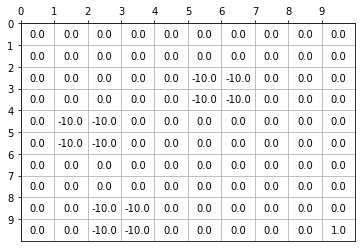

In [ ]:
reward_matrix1 = reward_grid_plot(gw.reward_func1)

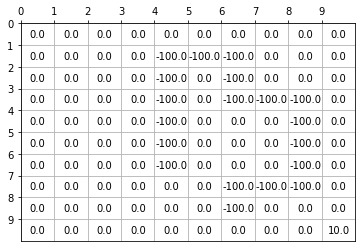

In [ ]:
reward_matrix2 = reward_grid_plot(gw.reward_func2)

# Q1.
For visualization purpose, generate heat maps of Reward Function 1 (RF1) and Reward Function 2 (RF2). For the heat maps, make sure you display the coloring scale. (2 PLOTS)

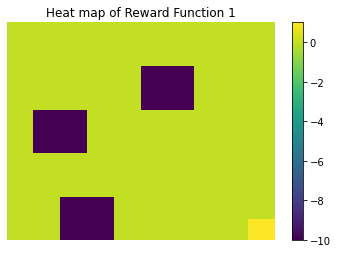

In [ ]:
## For visualization generating the heat map of the ground truth reward
plt.pcolor(np.flipud(reward_matrix1))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward Function 1')
plt.show()

In [ ]:
#ax = sns.heatmap(reward_matrix1, annot = True, fmt='', linewidths=.1, cbar=False)

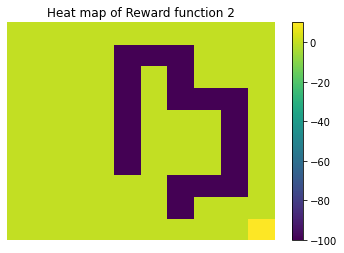

In [ ]:
plt.pcolor(np.flipud(reward_matrix2))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 2')
plt.show()

# Q2 Optimal State Values for Reward Functions

• Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure 1)

• Number of actions = 4 (set of possible actions is displayed in figure 2)

• w = 0.1

• Discount factor = 0.8

• Reward function 1

Write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ε = 0.01.

For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. (1 PLOT)

Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots of state values in 5 different steps linearly distributed from 1 to N. Report N and your step numbers. What observations do you have from the plots?(5 PLOT)

In [ ]:
## Implementing the algorithm for computing the optimal value function for each state
## The algorithm takes as input the MDP and returns an array of optimal values,
## where i^th value in the array corresponds to the optimal value of the i^th state.

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
    """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """

    #bellman optimality equation into an update rule

    #initialize the values of all states as 0
    optim_val = np.zeros(n_states)
    gamma = discount
    epsilon = threshold
    delta = math.inf #initialize delta to be large

    #estimation step:
    while delta > epsilon:
        delta = 0
        for s in range(n_states):
            v = optim_val[s] #optimal value of that state
            all_actions_vals = np.array([])
            for a in range(n_actions):
                action_value = 0 #for every action you get one value after summing through s'
                for s_prime in range(n_states):
                    P_a_s_sp = transition_probabilities(s, a, s_prime) #function
                    R_a_s_sp = reward[s_prime] #reward for next state
                    Vk_sp = optim_val[s_prime]
                    action_value = action_value + P_a_s_sp*(R_a_s_sp + (gamma * Vk_sp))
                all_actions_vals = np.append(all_actions_vals,action_value)
            optim_val[s] = max(all_actions_vals)
            delta = max(delta, abs(v - optim_val[s]))

    return optim_val


==Optimal Values for Reward Function 1===


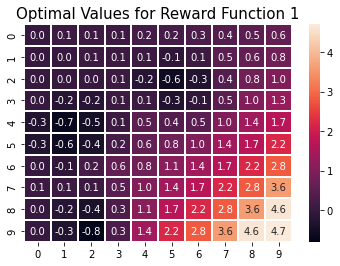

In [ ]:
## Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm
reward_states1 = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states1[i] = gw.reward_func1(i)

# Computing the optimal value of each state
v1 = optimal_value(gw.n_states, gw.n_actions, gw._transition_probability, reward_states1, gw.discount)


# Plotting

value_matrix1 = np.zeros((grid_size, grid_size))

for i in range(gw.n_states):
    value_matrix1[int(i%grid_size)][int(i/grid_size)] = round(v1[i], 1)

print('========================================')
print('==Optimal Values for Reward Function 1===')
print('========================================')
ax = sns.heatmap(value_matrix1, annot=True, fmt='', linewidths=.1, cbar=True)
plt.title('Optimal Values for Reward Function 1', fontsize = 15) # title with fontsize 20
plt.show()
print('========================================')


In [ ]:
#modified optial value function to check for convergence and plot checkpoints
def optimal_value_check_convergence(n_states, n_actions, plot_matrix, transition_probabilities, reward,
                  discount, threshold=1e-2):
    """
    Find the optimal value function. Check for convergence by reporting number of steps till convergence.
    Plots 5 different checkpoints of the value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    plot_matrix: Function taking in the value matrix
    -> Array of values for each state
    """

    #bellman optimality equation into an update rule

    #initialize the values of all states as 0
    optim_val = np.zeros(n_states)
    gamma = discount
    delta = math.inf #initialize delta to be large

    N = 0
    s00 = np.array([])
    s91 = np.array([])
    s09 = np.array([])
    s99 = np.array([])
    s44 = np.array([])
    #estimation step:
    while delta > threshold:
        delta = 0
        for s in range(n_states):
            v = optim_val[s] #optimal value of that state
            all_actions_vals = np.array([])
            for a in range(n_actions):
                action_value = 0 #for every action you get one value after summing through s'
                for s_prime in range(n_states):
                    P_a_s_sp = transition_probabilities(s, a, s_prime) #function
                    R_a_s_sp = reward[s_prime] #reward for next state
                    Vk_sp = optim_val[s_prime]
                    action_value = action_value + P_a_s_sp*(R_a_s_sp + (gamma * Vk_sp))
                all_actions_vals = np.append(all_actions_vals,action_value)
            optim_val[s] = max(all_actions_vals)
            delta = max(delta, abs(v - optim_val[s]))

        # show snapshot of optimal values at 5 different values of N, lines 49-64
        #------------------------------------------------------------------------
        if (N==4)or(N==8)or(N==12)or(N==16)or(N==20):
            value_matrix = np.zeros((grid_size, grid_size))
            for i in range(gw.n_states):
                value_matrix[int(i%grid_size)][int(i/grid_size)] = round(optim_val[i], 1)

            s00 = np.append(s00, value_matrix[0][0])
            s91 = np.append(s91, value_matrix[9][1])
            s09 = np.append(s09, value_matrix[0][9])
            s99 = np.append(s99, value_matrix[9][9])
            s44 = np.append(s44, value_matrix[4][4])

            print('========================================')
            print('Snap-shot of Optimal Values for N: ', N)
            print('========================================')
            #plot_matrix(value_matrix)
            ax = sns.heatmap(value_matrix, annot=True, fmt='', linewidths=.1, cbar=True)
            plt.title('Snap-shot of Optimal Values', fontsize = 15) # title with fontsize 20
            plt.show()
            print('========================================')
        #------------------------------------------------------------------------
        N+=1

    return optim_val, N, s00, s09, s99, s44, s91

**Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots
of state values in 5 different steps linearly distributed from 1 to N . Report N and your
step numbers. What observations do you have from the plots?**

**ANSWER:**

The algorithm convergest with N = 21 steps. Step numbers are 4, 8, 12, 16, 20.

**Observations:** Based on the matrix plots and the scatter plots below, the optimal values of the states located at the bottom left corner (09), middle (44), and bottom right corner (99) all increase over time. The plots at the top left (00) and top right (91) corners stay constant overtime. State 99 begins with the largest state optimal value and increases to reach the highest value of all states. The top right corner (91) is consistently the lowest valued state.

Reward Function 1
Snap-shot of Optimal Values for N:  4


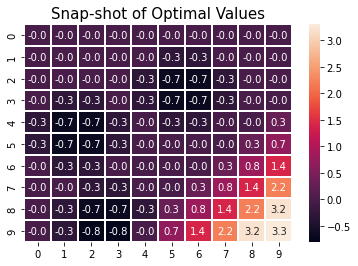

Snap-shot of Optimal Values for N:  8


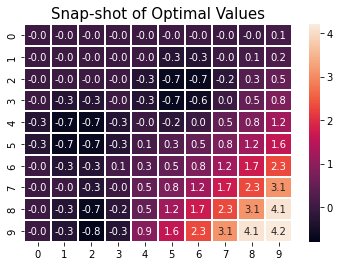

Snap-shot of Optimal Values for N:  12


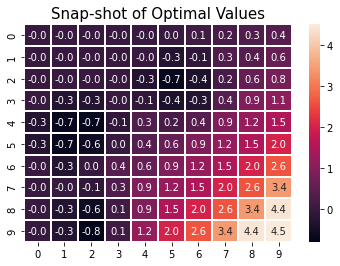

Snap-shot of Optimal Values for N:  16


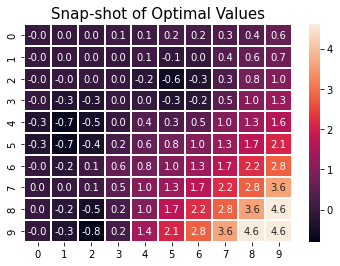

Snap-shot of Optimal Values for N:  20


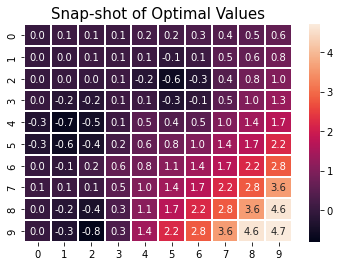

The total number of steps requried until convergene is:  21


In [ ]:
# Generating the array of rewards to be passed onto the optimal value algorithm
reward_states1 = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states1[i] = gw.reward_func1(i)

# Computing the optimal value of each state and checking the value of N
print('Reward Function 1')
optim_val, N, s00, s09, s99, s44, s91 = (optimal_value_check_convergence(gw.n_states,
            gw.n_actions, plot_matrix, gw._transition_probability, reward_states1, gw.discount))
print('The total number of steps requried until convergene is: ', N)

# Optimal Value of Selected States vs N (number of iterations).

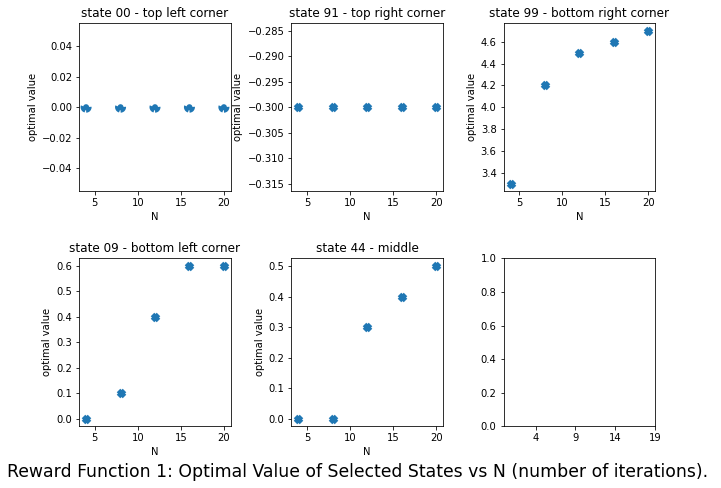

In [ ]:

fig, ax = plt.subplots(2, 3, figsize=(10,7))
fig.tight_layout()

ax[0, 0].scatter(np.linspace(4,20,5),s00, marker='o', linewidth=5, linestyle=':')
plt.xticks(np.arange(4,21, step=5))
ax[0, 0].set_title('state 00 - top left corner')
ax[0, 0].set_xlabel('N')
ax[0, 0].set_ylabel('optimal value')

ax[1, 0].scatter(np.linspace(4,20,5, endpoint=True),s09, marker='x', linewidth=5)
plt.xticks(np.arange(4,21, step=5))
ax[1, 0].set_title('state 09 - bottom left corner')
ax[1, 0].set_xlabel('N')
ax[1, 0].set_ylabel('optimal value')

ax[1, 1].scatter(np.linspace(4,20,5, endpoint=True), s44, marker='x', linewidth=5)
plt.xticks(np.arange(4,21, step=5))
ax[1, 1].set_title('state 44 - middle')
ax[1, 1].set_xlabel('N')
ax[1, 1].set_ylabel('optimal value')

ax[0, 1].scatter(np.linspace(4,20,5, endpoint=True), s91, marker='x', linewidth=5)
plt.xticks(np.arange(4,21, step=5))
ax[0, 1].set_title('state 91 - top right corner')
ax[0, 1].set_xlabel('N')
ax[0, 1].set_ylabel('optimal value')

ax[0, 2].scatter(np.linspace(4,20,5, endpoint=True), s99, marker='x', linewidth=5)
plt.xticks(np.arange(4,21, step=5))
ax[0, 2].set_title('state 99 - bottom right corner')
ax[0, 2].set_xlabel('N')
ax[0, 2].set_ylabel('optimal value')

#adding space between the subplots

t = ('Reward Function 1: Optimal Value of Selected States vs N (number of iterations). ')
plt.figtext(0, 0, t, fontsize = 'xx-large',wrap=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right =0.9,
                    top=0.9, wspace=0.4,hspace=0.4)


# Q 3. Heat Map of the Optimal State Values Across the 2D Grid. RF1

==Optimal Values for Reward Function 1===


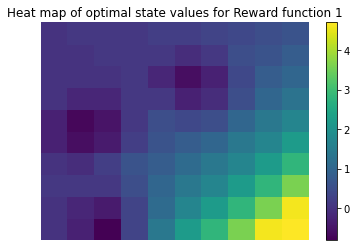

In [ ]:
print('========================================')
print('==Optimal Values for Reward Function 1===')
print('========================================')
plt.pcolor(np.flipud(value_matrix1))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()
print('========================================')


# *Q 4: Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in question 3 to explain), RF1


**ANSWER:**

The distribution of the figure **(Heat Map of Optimal State Values for Reward Function 1)** would look normally distributed and centered since there seems to be variation in the values that states can take on.

The gradient from low optimal valued states located towards the top left of the grid to higher optimal valued states located at the bottom right corner. The graph indicates a high variability in the values that any state can take.

The small pockets of dark blue distributed among the larger blue section are concentrated in areas of negative reward. These dark blue pockets have the lowest optimal valued states of the grid world, which is consistent with the reward grid. The dark blue (negative reward) sections diffuse.



# Q 5: Implement the computation step of the value iteration algorithm to obtain optimal actions, RF1
For visualization purpose, you should generate a figure similar to that of figure 1 but
with the number of state replaced by the optimal action at that state. The optimal actions
should be displayed using arrows. Does the optimal policy of the agent match your
intuition? Please provide a brief explanation. Is it possible for the agent to compute the
optimal action to take at each state by observing the optimal values of it’s neighboring
states? In this question, you should have 1 plot.

In [ ]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """
    #computation step: the action that is expected to lead to the highest valued state
    gamma = discount
    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
        action_values = np.array([])
        #for every possible action, get a value and find the max
        for a in range(n_actions):
            value = 0
            for s_prime in range(n_states):
                value = value + transition_probabilities(s, a, s_prime)*(reward[s_prime] + (gamma * v[s_prime]))
            action_values = np.append(action_values,value)
        policy_s = np.argmax(action_values)
        return policy_s

    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [ ]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    ''' Function for plotting the optimal actions at each state in the grid
    The function takes as input the matrix containing optimal actions
    and plots the actions for each state on the grid'''
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'

            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

def policy_to_arrows(policy):
    '''policy_to_arrows function
    inputs: policy np array containing values 0,1,2,3 for each state'''
    arrow_dict = {0: u'↓', 1:u'→', 2:u'↑',3:u'←'}
    policy_arrows = np.array(policy, dtype="object")
    for row in range(len(policy)):
        for col in range(len(policy)):
            idx = policy[row,col]
            policy_arrows[row,col] = arrow_dict[idx]
    return policy_arrows

------------------------------------
Optimal policy (Action Matrix) for reward function 1
------------------------------------


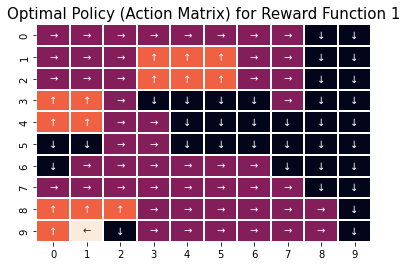

In [ ]:
## Plotting the optimal actions for each state in the grid

#using reward function 1
reward_states1 = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states1[i] = gw.reward_func1(i)

# Finding the array of optimal policy using reward function 1
optimal_policy1 = find_policy(gw.n_states, gw.n_actions, gw._transition_probability, reward_states1, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions
action_matrix1 = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix1[int(i%grid_size)][int(i/grid_size)] = optimal_policy1[i]

print('------------------------------------')
print("Optimal policy (Action Matrix) for reward function 1")
print('------------------------------------')
#plot_arrow(action_matrix1)
policy1_arrows = policy_to_arrows(action_matrix1)
ax = sns.heatmap(action_matrix1, annot = policy1_arrows, fmt='', linewidths=.1, cbar=False)
plt.title('Optimal Policy (Action Matrix) for Reward Function 1', fontsize = 15) # title with fontsize 20
plt.show()


**ANSWER:**
The map of optimal policy for reward function 1 shows the columns of states on the right with downward arrows and the rows of states on the bottom of the grid with right-pointing arrows. The downward arrows and right-pointing arrows converge at the states located in the diagonal of the grid space. This is consistent with the optimal state values for RF1 (reward function) where highest valued states are in the bottom right corner.

It is possible to compute the optimal policy of a state given its neighboring state.

For a state not at a boundary or corner there are 8 states to consider. For a state at a boundary, or at a corner there are 5 or 3 states respectively to consider.

**The random selection of states below shows that the optimal action taken at the state can be determined by the action taken by the majority of its neighboring states. Here are some examples which can be verified by the grid above.**

state number: 71; optimal state action: right; neighborhood state's optimal actions: 5 right, 3 down

state number: 67; optimal state action: right; neighborhood state's optimal actions: 7 right, 1 down

state number: 09; optimal state action: up; neighborhood state's optimal actions: 2 up, 1 left

state number: 30; optimal state action: right; neighborhood state's optimal actions: 3 right, 2 up

# Q 6: Modify the environment of the agent by replacing Reward function 1 with Reward function 2. RF2 Optimal Values
Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

==Optimal Values for Reward Function 2===


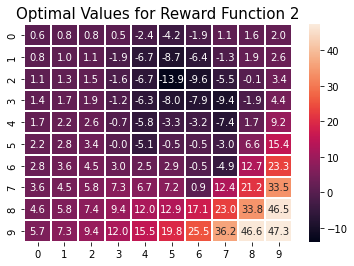

In [ ]:
# Generating the array of rewards to be passed onto the optimal value algorithm
reward_states2 = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states2[i] = gw.reward_func2(i)

# Computing the optimal value of each state
v2 = optimal_value(gw.n_states, gw.n_actions, gw._transition_probability, reward_states2, gw.discount)

# Plotting
value_matrix2 = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix2[int(i%grid_size)][int(i/grid_size)] = round(v2[i], 1)

print('========================================')
print('==Optimal Values for Reward Function 2===')
print('========================================')
#plot_matrix(value_matrix2) #shows only values with no colors
ax = sns.heatmap(value_matrix2, annot=True, fmt='', linewidths=.1, cbar=True)
plt.title('Optimal Values for Reward Function 2', fontsize = 15) # title with fontsize 20
plt.show()
print('========================================')
print('========================================')

# * Q 7: RF 2 Optimal Values Heat Map
Generate a heat map of the optimal state values (found in
question 6) across the 2-D grid. For generating the heat map, you can use the same
function provided in the hint earlier.
Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the
figure generated in this question to explain)


**ANSWER:**
**The distribution of this graph would be positively skewed (majority of the distribution is towards the low values), since the majority of the graph shows small values under 10.**

The higher valued states are concentrated in the bottom right while the section containing the lower valued states is concentratede towards the top middle section of the grid.

Since the low value states are concentrared in closer to the highest reward state, there is lower variability in the values that states will take on, especially compared to reward function 1.


==Optimal Values for Reward Function 2===


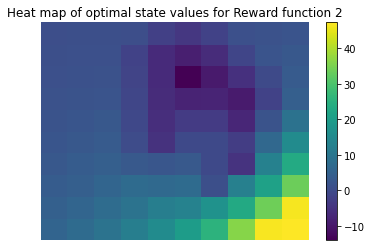

In [ ]:
print('========================================')
print('==Optimal Values for Reward Function 2===')
print('========================================')
plt.pcolor(np.flipud(value_matrix2))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 2')
plt.show()
print('========================================')

# Q 8: RF2 Optimal Policy
Implement the computation step of the value iteration algorithm to compute the optimal policy of the agent navigating the 2-D state-space.
For visualization purpose, you should generate a figure similar to that of figure 1 but
with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows.

 Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

------------------------------------
Optimal policy (Action Matrix) for reward function 2
------------------------------------


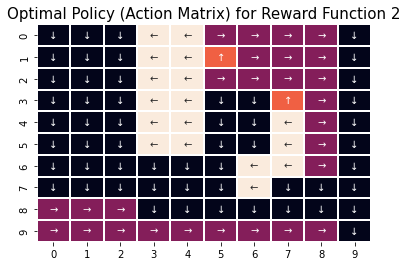

In [ ]:
print('------------------------------------')
print("Optimal policy (Action Matrix) for reward function 2")
print('------------------------------------')
#plot_arrow(action_matrix2)
policy2_arrows = policy_to_arrows(action_matrix2)
ax = sns.heatmap(action_matrix2, annot = policy2_arrows, fmt='', linewidths=.1, cbar=False)
plt.title('Optimal Policy (Action Matrix) for Reward Function 2', fontsize = 15) # title with fontsize 20
plt.show()

# Question 9: Change the hyper parameter w to 0.6 and find the optimal policy map similar to previous question for reward functions.
Explain the differences you observe. What do you think about value of new w compared to previous value? Choose the
w that you think give rise to better optimal policy and use that w for the next stages of
the project.

In [ ]:

#Creating a new gridworld with new wind parameter
wind = 0.6
grid_size = 10
discount = 0.8
gw_new = Gridworld(grid_size, wind, discount)

------------------------------------
Optimal policy (Action Matrix) for reward function 1, Wind = 0.6
------------------------------------


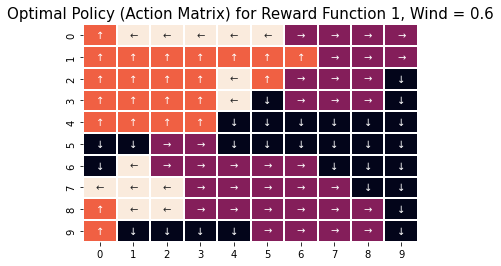

------------------------------------
Optimal policy (Action Matrix) for reward function 2, Wind = 0.6
------------------------------------


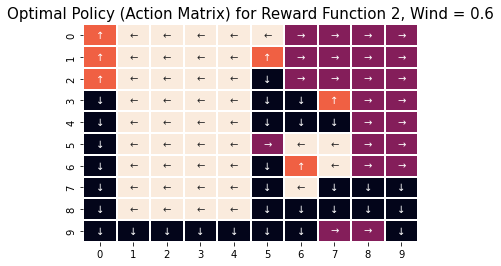

In [ ]:
# Generating the array of rewards to be passed onto the optimal value algorithm
reward_states1 = np.zeros(gw_new.n_states)
reward_states2 = np.zeros(gw_new.n_states)
for i in range(gw_new.n_states):
    reward_states1[i] = gw_new.reward_func1(i)
    reward_states2[i] = gw_new.reward_func2(i)

# Finding the array of optimal policy using reward function 1
optimal_policy1 = find_policy(gw_new.n_states, gw_new.n_actions, gw_new._transition_probability, reward_states1, gw_new.discount, stochastic=False)
optimal_policy2 = find_policy(gw_new.n_states, gw_new.n_actions, gw_new._transition_probability, reward_states2, gw_new.discount, stochastic=False)

# Generating the matrix containing the optimal actions
action_matrix1 = np.zeros((grid_size, grid_size))
action_matrix2 = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix1[int(i%grid_size)][int(i/grid_size)] = optimal_policy1[i]
    action_matrix2[int(i%grid_size)][int(i/grid_size)] = optimal_policy2[i]
print('------------------------------------')
print("Optimal policy (Action Matrix) for reward function 1, Wind = 0.6")
print('------------------------------------')
#plot_arrow(action_matrix2)
policy1_arrows = policy_to_arrows(action_matrix1)
ax = sns.heatmap(action_matrix1, annot = policy1_arrows, fmt='', linewidths=.1, cbar=False)
plt.title('Optimal Policy (Action Matrix) for Reward Function 1, Wind = 0.6', fontsize = 15)
plt.show()
print('------------------------------------')
print("Optimal policy (Action Matrix) for reward function 2, Wind = 0.6")
print('------------------------------------')
#plot_arrow(action_matrix2)
policy2_arrows = policy_to_arrows(action_matrix2)
ax = sns.heatmap(action_matrix2, annot = policy2_arrows, fmt='', linewidths=.1, cbar=False)
plt.title('Optimal Policy (Action Matrix) for Reward Function 2, Wind = 0.6', fontsize = 15)
plt.show()

Increasing the value of the wind parameter means we increase the probability of moving randomly and more states take on negative optimal values. The previously negative optimal values (when w = 0.1) become a lot more negative, and the positive ones become smaller. Overall there is a shift towards smaller values when w=0.6.

**Comparing Optimal Values**

For example, in (RF1, W=0.6) the smallest optimal value is around -7.5, whereas in (RF1, W=0.1) the smallest optimal value was around -0.8 according to the heat maps.

Then, in (RF2, W=0.6) the smallest optimal value is -117, whereas in (RF2, W=0.1) the smallest optimal value was around -13.9.

For example, in (RF1, W=0.6) the largest optimal value is around 3, whereas in (RF1, W=0.1) the largest optimal value was around 4.7 according to the heat maps.

Then, in (RF2, W=0.6) the largest optimal value is 23.1 whereas in (RF2, W=0.1) the largest optimal value was around 47.3.

**Comparing Optimal Policies**
On the bottom right part of the (RF1, W=0.6) Optimal Policy still has the same trend as the previous
Compared to the previous gridworld, the new gridworld with w = 0.6 shows more arrows pointing away from the highest valued state and there is an overall greater number of left pointing arrows compared to the previous gridworld.

Increasing wind factor for some action means less control over the action. Make the states values more diffused.

==Optimal Values for Reward Function 1===


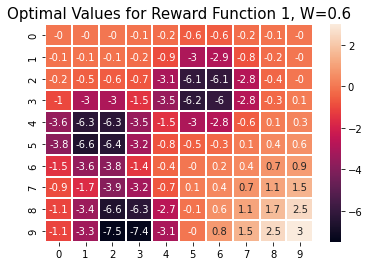

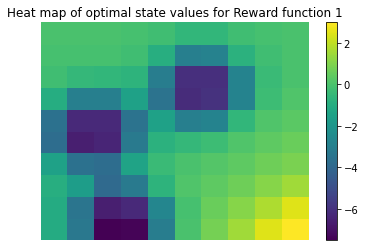

==Optimal Values for Reward Function 2===


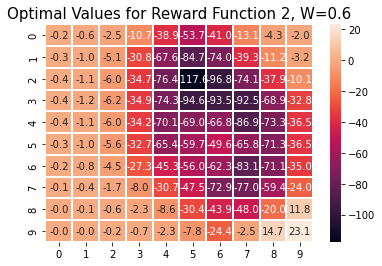

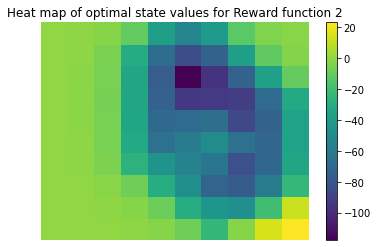

In [ ]:
# Generating the array of rewards to be passed onto the optimal value algorithm
# Generating the array of rewards to be passed onto the optimal value algorithm
reward_states1 = np.zeros(gw_new.n_states)
reward_states2 = np.zeros(gw_new.n_states)
for i in range(gw_new.n_states):
    reward_states1[i] = gw_new.reward_func1(i)
    reward_states2[i] = gw_new.reward_func2(i)

# Computing the optimal value of each state
v1 = optimal_value(gw_new.n_states, gw_new.n_actions, gw_new._transition_probability, reward_states1, gw_new.discount)
v2 = optimal_value(gw_new.n_states, gw_new.n_actions, gw_new._transition_probability, reward_states2, gw_new.discount)
# Plotting
value_matrix1 = np.zeros((grid_size, grid_size))
value_matrix2 = np.zeros((grid_size, grid_size))
for i in range(gw_new.n_states):
    value_matrix1[int(i%grid_size)][int(i/grid_size)] = round(v1[i], 1)
    value_matrix2[int(i%grid_size)][int(i/grid_size)] = round(v2[i], 1)
print('========================================')
print('==Optimal Values for Reward Function 1===')
print('========================================')
#plot_matrix(value_matrix2) #shows only values with no colors
ax = sns.heatmap(value_matrix1, annot=True, linewidths=.1, cbar=True)
plt.title('Optimal Values for Reward Function 1, W=0.6', fontsize = 15) # title with fontsize 20
plt.show()
print('========================================')
plt.pcolor(np.flipud(value_matrix1))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()
print('========================================')
print('==Optimal Values for Reward Function 2===')
print('========================================')
#plot_matrix(value_matrix2) #shows only values with no colors
ax = sns.heatmap(value_matrix2, annot=True, fmt='', linewidths=.1, cbar=True)
plt.title('Optimal Values for Reward Function 2, W=0.6', fontsize = 15) # title with fontsize 20
plt.show()
print('========================================')
plt.pcolor(np.flipud(value_matrix2))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 2')
plt.show()
print('========================================')